# **Case Study for Statistical Methods**
## **Written by:** Aarish Asif Khan
## **Date:** 3 February 2024

In [2]:
# import the libraries
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import scipy.stats as stats
import seaborn as sns 
import statsmodels.api as sm 
from statsmodels.formula.api import ols
import statsmodels.multivariate.manova as manova

### **Chi-Squared Test**

In [3]:
# import libraries
import numpy as np 
from scipy.stats import chisquare

# Hypothetical observed frequencies
observed_frequencies = np.array([30, 70])  # e.g., 30 vegetarian and 70 non-vegetarian meals

# Expected frequencies (assuming a 50-50 distribution)
total_meals = observed_frequencies.sum()
expected_frequencies = np.array([total_meals * 0.5, total_meals * 0.5])

# Perform the Chi-Squared test
chi2_stat, p_value = chisquare(observed_frequencies, f_exp=expected_frequencies)

# Output the results
print(f"Chi-Squared Statistic: {chi2_stat}")
print(f"P-value: {p_value}")

# print results with if else conditions
if p_value < 0.05:
    print("Reject null hypothesis, there is a significant difference between the groups")
else:
    print("Fail to reject null hypothesis, there is no significant difference between the groups ")

Chi-Squared Statistic: 16.0
P-value: 6.334248366623988e-05
Reject null hypothesis, there is a significant difference between the groups


### **Explanation of the code above**


This Python code performs a Chi-Squared test for independence. It assumes two categories (e.g., vegetarian and non-vegetarian meals) and tests if there is a significant difference between the observed frequencies and the expected frequencies under the assumption of equal distribution (50-50). The results, including the Chi-Squared statistic and p-value, are printed. Based on the p-value, it then makes a decision to either reject or fail to reject the null hypothesis, indicating whether there is a significant difference between the groups.

### **Chi-Squared Contingency**

In [4]:
# import the libraries
import numpy as np 
import seaborn as sns 
import scipy
from scipy.stats import chi2_contingency

In [5]:
# load dataset of tips
df = sns.load_dataset('tips')
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [7]:
# create a contigency table / crosstable
contigency_table = pd.crosstab(df['sex'], df['smoker'])
contigency_table

smoker,Yes,No
sex,,
Male,60,97
Female,33,54


In [11]:
# perform the chi-squared test 
chi2, p, dof, expected = chi2_contingency(contigency_table)

# print the output results
print(f'chi-square: \n', {chi2})
print(f'p-value: \n', {p})
print(f'degree-of-freedom: \n', {dof})
print(f'expected-value: \n', np.array(expected))

chi-square: 
 {0.0}
p-value: 
 {1.0}
degree-of-freedom: 
 {1}
expected-value: 
 [[59.84016393 97.15983607]
 [33.15983607 53.84016393]]


In [12]:
# print the output results based on if else condition

if p < 0.05:
    print("Reject null hypothesis, there is significant difference between the groups")
else:
    print("Failed to reject null hypothesis, there is no significant difference between the groups")

Failed to reject null hypothesis, there is no significant difference between the groups


### **T-test**

1. ### **One-sample T-test**

In [13]:
# one-sample t test
# import the libraries
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
import scipy.stats as stats

In [14]:
# load dataset of tips
df = sns.load_dataset('tips')
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


<Axes: xlabel='total_bill', ylabel='Count'>

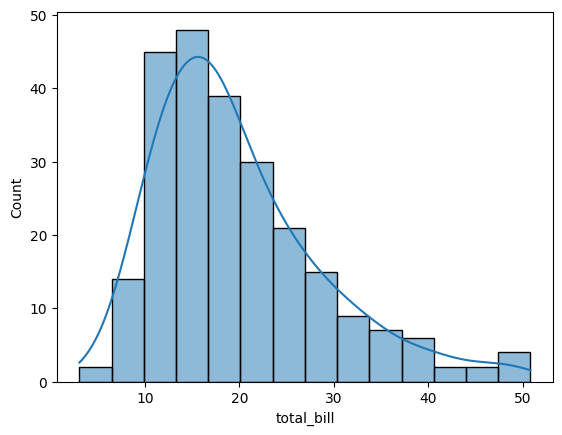

In [15]:
# creating a histplot on the basis of continuous value
sns.histplot(df['total_bill'], kde=True)

In [16]:
# applying shapiro wilk method to check the normality of the data

t_statistic, p = stats.shapiro(df['total_bill'])

In [17]:
# print the output results 
print('t-statistic:', t_statistic)
print('p-value:', p)

t-statistic: 0.9197186231613159
p-value: 3.3244529351605934e-10


In [19]:
# print the output results using if else condition
if p < 0.05:
    print("Reject Null Hypothosis, data is not normally distributed")
else:
    print("Fail to Reject Null Hypothosis, data is normally distributed")

Reject Null Hypothosis, data is not normally distributed


2. ### **Two-sample Independent T test**

In [24]:
df = sns.load_dataset('titanic')

In [29]:
df['age'] = df['age'].fillna(df['age'].median())
df['fare'] = df['fare'].fillna(df['fare'].median())

In [32]:
age_male = df[df['sex'] == 'male']['age']
age_female = df[df['sex'] == 'female']['age']

statistic, p = stats.ttest_ind(age_male, age_female)

# print output results
print('statistic', statistic)
print('p-value', p)

statistic 2.4279606481426024
p-value 0.015381536989875317


In [37]:
# print the output results based on if else condition
if p < 0.05:
    print(f"Reject Null Hypothesis, There is a significant difference between ages of male and female")
else:
    print(f"Failed to Reject Null Hypothesis, There isnt a significant difference between ages of male and female")

Reject Null Hypothesis, There is a significant difference between ages of male and female


### **ANOVA**

In [38]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


### **One-Way ANOVA**

In [43]:
df[['age', 'pclass']].head()

,age,pclass
0,22.0,3
1,38.0,1
2,26.0,3
3,35.0,1
4,35.0,3


In [44]:
import scipy.stats as stats
import statsmodels.api as sm 
from statsmodels.formula.api import ols 

# ANOVA test for age and class
model = ols("age ~ pclass", data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
pclass,17429.695048,1.0,116.122704,1.558883e-25
Residual,133436.428421,889.0,NaN,NaN


<Axes: xlabel='pclass', ylabel='age'>

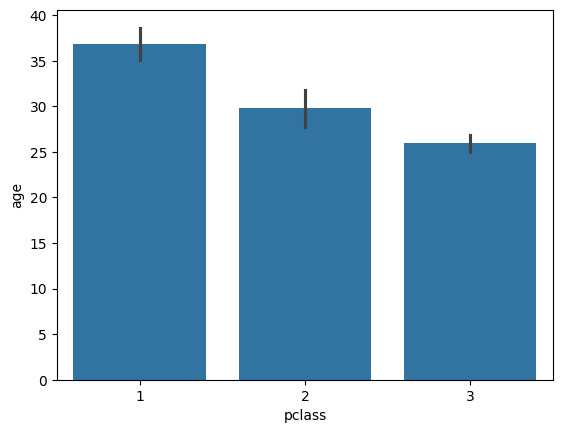

In [45]:
sns.barplot(x='pclass', y='age', data=df)

<Axes: xlabel='age', ylabel='Count'>

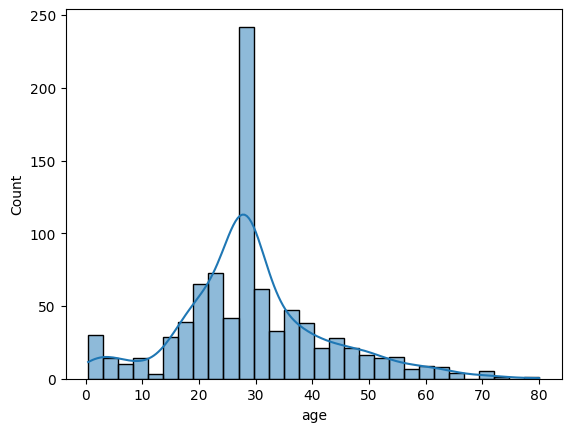

In [46]:
sns.histplot(df['age'], kde=True)

<Axes: xlabel='age', ylabel='Count'>

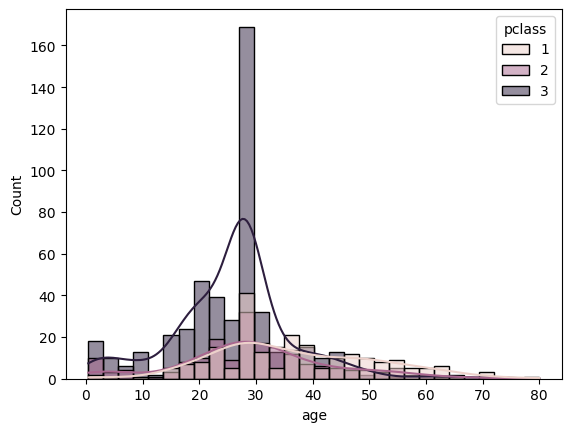

In [47]:
sns.histplot(df, x='age', hue='pclass', kde=True)

<Axes: xlabel='age', ylabel='Count'>

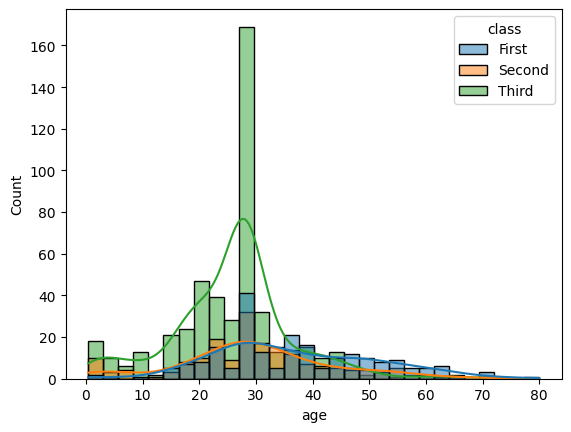

In [55]:
sns.histplot(df, x='age', hue='class', kde=True)

### **Two-Way ANOVA**

In [56]:
# stats models
import statsmodels.api as sm
from statsmodels.formula.api import ols

# ANOVa test for age and class
# model = ols("age ~ pclass + who + pclass:who", data=df).fit()
# or this
model = ols("age ~ sex * who", data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

                sum_sq     df             F        PR(>F)
sex                NaN    1.0           NaN           NaN
who       1.294561e-10    2.0  5.611466e-13  9.999994e-01
sex:who   5.233208e+04    2.0  2.268412e+02  8.119221e-46
Residual  1.023151e+05  887.0           NaN           NaN


c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:1896: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 1, but rank is 0
  warnings.warn('covariance of constraints does not have full '
c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:1925: RuntimeWarning: invalid value encountered in divide
  F /= J
c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:1896: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 2, but rank is 1
  warnings.warn('covariance of constraints does not have full '
c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:1896: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 2, but rank is 1
  warnings.warn('covariance of constraints does not have full 

In [57]:
# Tukey HSD pairwise comparison
from statsmodels.stats.multicomp import pairwise_tukeyhsd

tukey = pairwise_tukeyhsd(df['age'], df['sex'] + df['who'] , alpha=0.05)
tukey.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
femalechild,femalewoman,24.0084,0.0,19.4706,28.5462,True
femalechild,malechild,-1.7426,0.8815,-7.8152,4.3301,False
femalechild,maleman,24.7693,0.0,20.3881,29.1505,True
femalewoman,malechild,-25.751,0.0,-30.4333,-21.0686,True
femalewoman,maleman,0.7609,0.7773,-1.299,2.8207,False
malechild,maleman,26.5118,0.0,21.9811,31.0426,True


<Axes: xlabel='who', ylabel='age'>

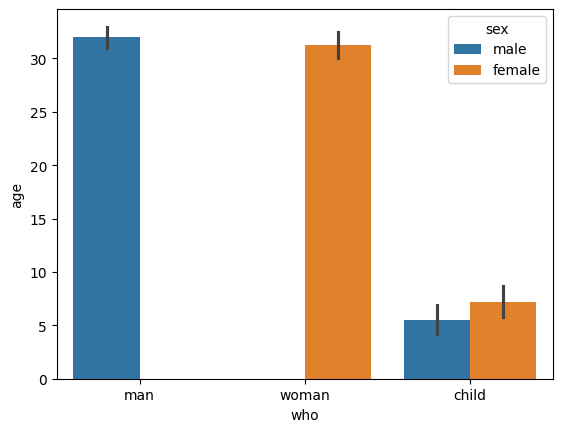

In [58]:
sns.barplot(df, x= 'who', y = 'age', hue='sex')

### **Co-Relation**

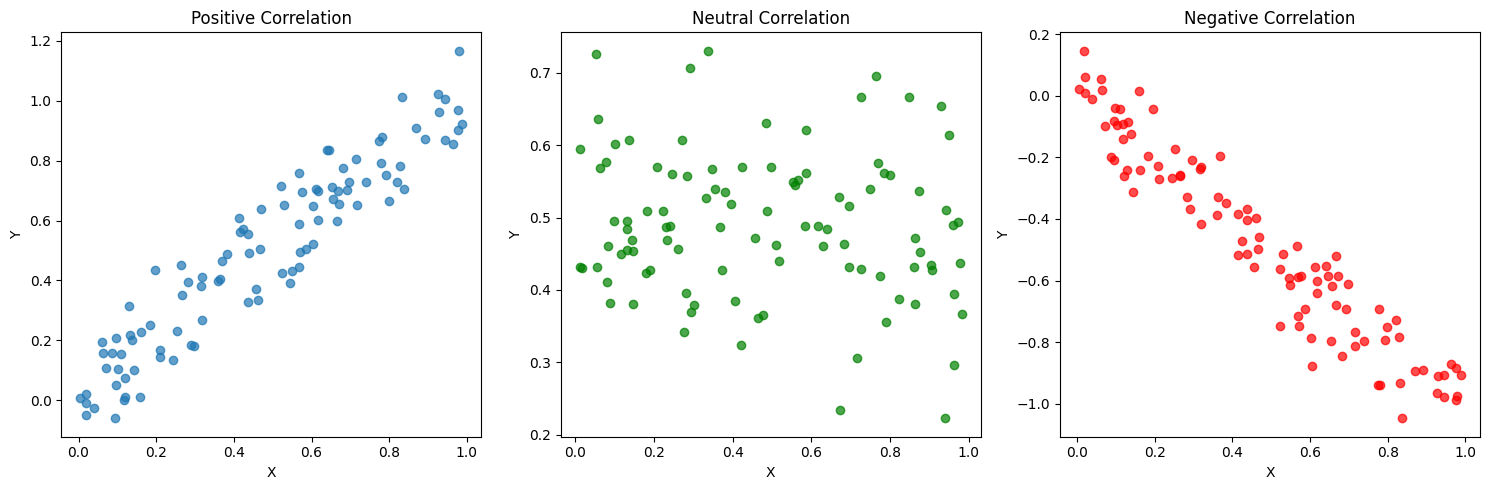

In [59]:
import numpy as np
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(0)

# Generate synthetic data
# Positive correlation
x = np.random.rand(100)
y_pos = x + np.random.normal(0, 0.1, 100)

# Neutral correlation
x_neutral = np.random.rand(100)
y_neutral = np.random.normal(0.5, 0.1, 100)

# Negative correlation
y_neg = -x + np.random.normal(0, 0.1, 100)

# Plotting the correlations
plt.figure(figsize=(15, 5))

# Positive Correlation
plt.subplot(1, 3, 1)
plt.scatter(x, y_pos, alpha=0.7)
plt.title('Positive Correlation')
plt.xlabel('X')
plt.ylabel('Y')

# Neutral Correlation
plt.subplot(1, 3, 2)
plt.scatter(x_neutral, y_neutral, alpha=0.7, color='green')
plt.title('Neutral Correlation')
plt.xlabel('X')
plt.ylabel('Y')

# Negative Correlation
plt.subplot(1, 3, 3)
plt.scatter(x, y_neg, alpha=0.7, color='red')
plt.title('Negative Correlation')
plt.xlabel('X')
plt.ylabel('Y')

plt.tight_layout()
plt.show()